In [ ]:
!pip install --upgrade tensorflow

In [ ]:
!pip install datasets

In [ ]:
import tensorflow as tf
print(tf.__version__)

2.16.1


In [ ]:
import os
import tensorflow as tf
from tensorflow import keras

In [ ]:
print(keras.__version__)

3.3.3


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import load_model
from tensorflow.keras.applications.xception import Xception
import pickle
from google.colab import files
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.text import Tokenizer

In [ ]:
from keras.models import load_model

# Load the Keras model
model = load_model('/content/drive/MyDrive/Colab Notebooks/dsci471/models4/model_30k_9.keras')

In [ ]:
from datasets import load_dataset

# Load the dataset
dataset = load_dataset("nlphuji/flickr30k", streaming=True)
test_dataset = dataset["test"]

In [ ]:
# Load pre-trained models
model = load_model('/content/drive/MyDrive/Colab Notebooks/dsci471/models4/model_30k_9.keras')
with open("/content/drive/My Drive/Colab Notebooks/dsci471/models4/tokenizer_4_tux.pkl", "rb") as handle:
    tokenizer = pickle.load(handle)
xception_model = Xception(include_top=False, pooling="avg")

# Code to test first 20 images in dataset

In [ ]:
# Get the first __ images
dataset_iter = iter(test_dataset)
images = [next(dataset_iter)['image'] for _ in range(20)]
print("First __ images:", images)

First __ images: [<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=333x500 at 0x7EDAB03CA1D0>, <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x374 at 0x7EDAB03C9FF0>, <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=375x500 at 0x7EDAB03C9E40>, <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x333 at 0x7EDAB03C9EA0>, <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x375 at 0x7EDAB03C8220>, <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x333 at 0x7EDAB03CA020>, <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=333x500 at 0x7EDAB03C9F60>, <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=335x500 at 0x7EDAB03CA2F0>, <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=330x500 at 0x7EDAB03CA050>, <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x230 at 0x7EDAB03CA4D0>, <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x375 at 0x7EDAB03CA560>, <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x335 at 0x7

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 371ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 379ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 363ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 370ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 596ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 636ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 366ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 360ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 361ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 389ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 377ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 646ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 637ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 378ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 382ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 379ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 387ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 375ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 604ms/step


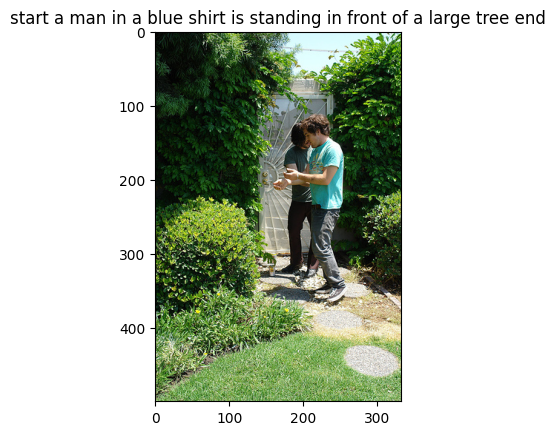

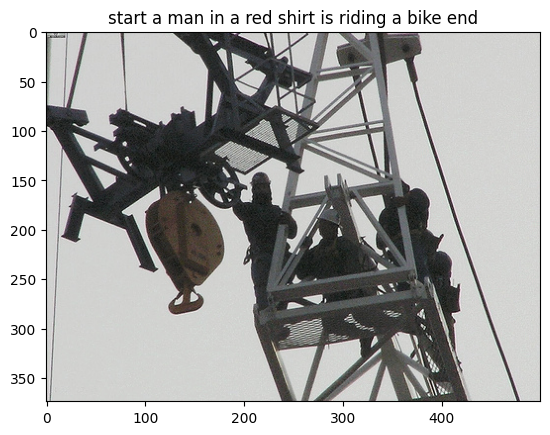

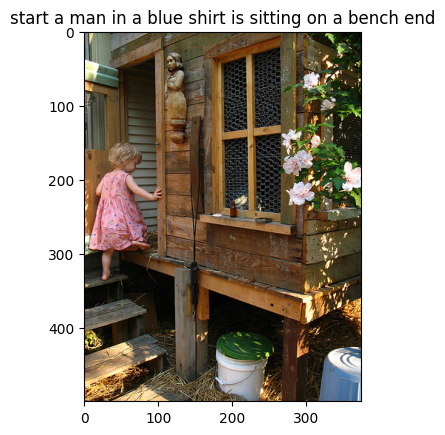

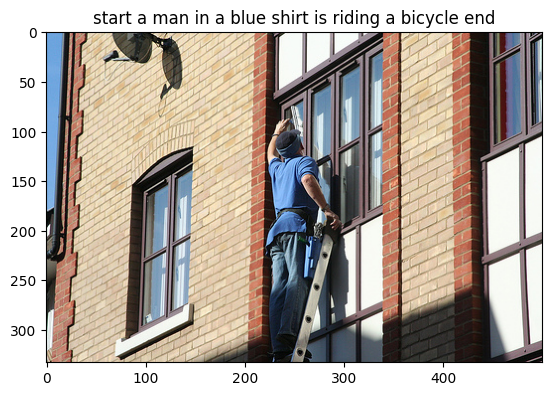

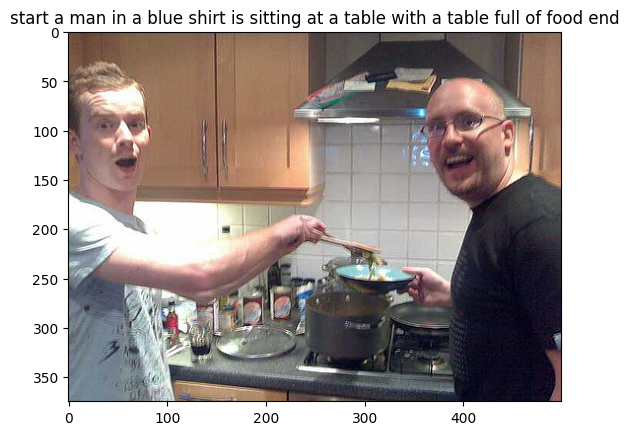

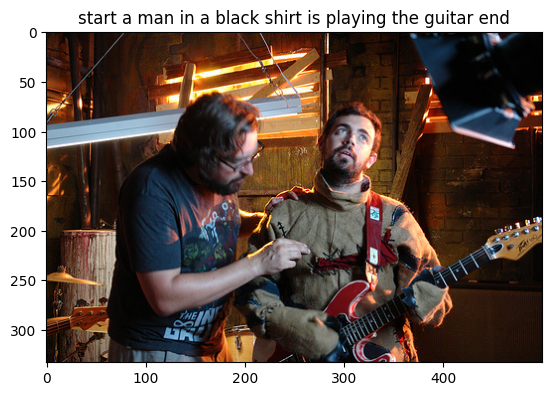

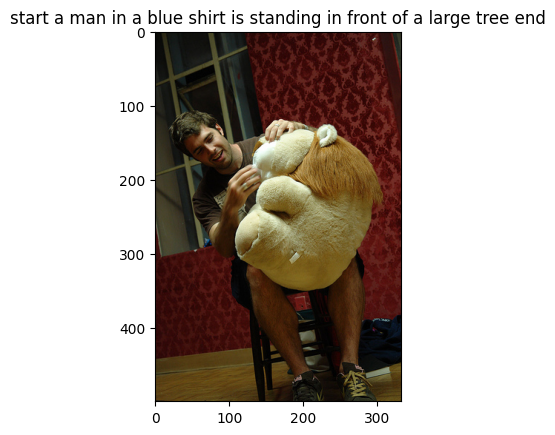

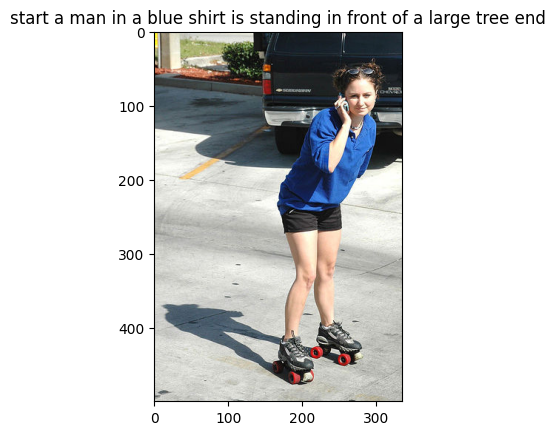

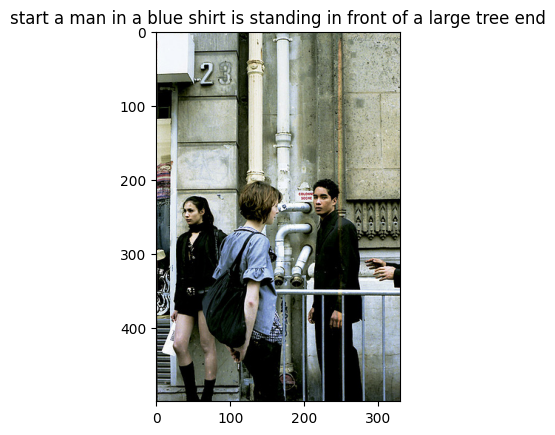

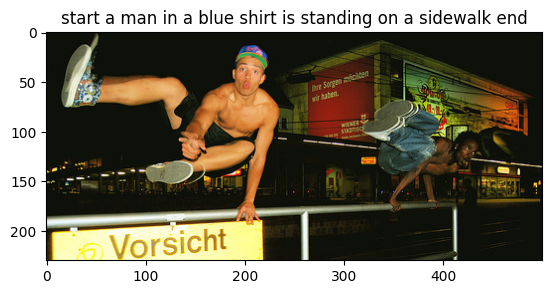

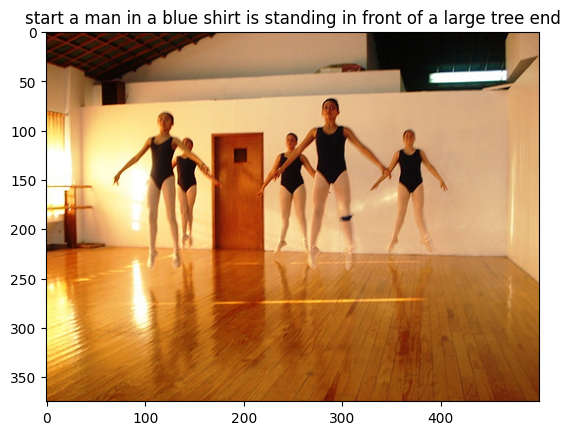

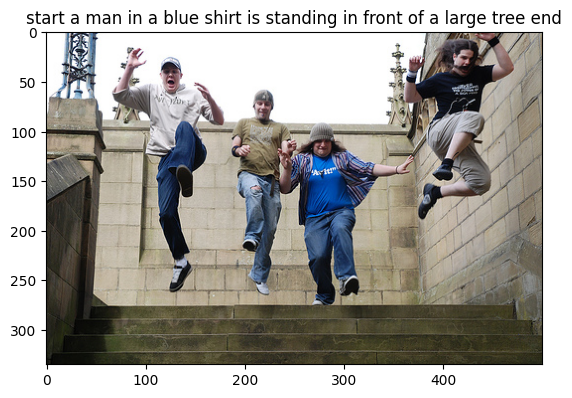

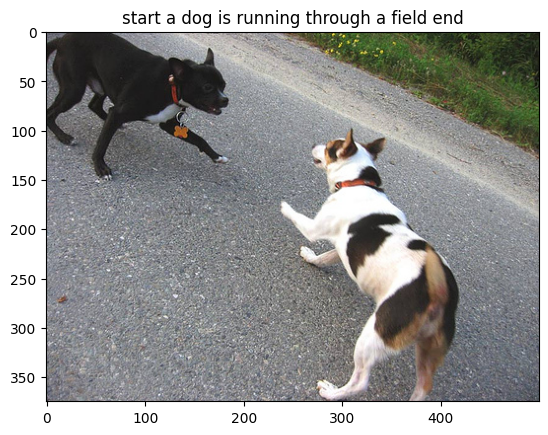

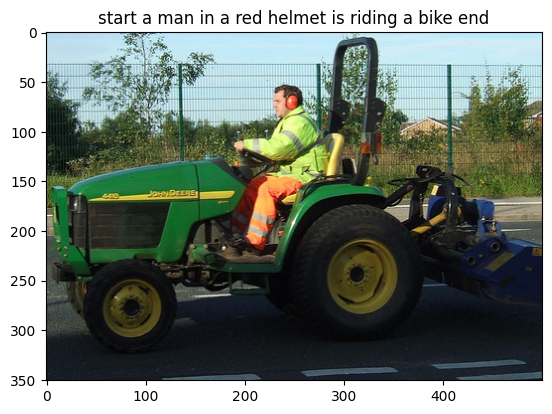

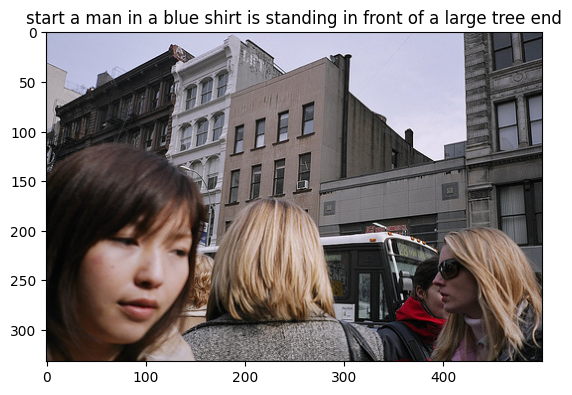

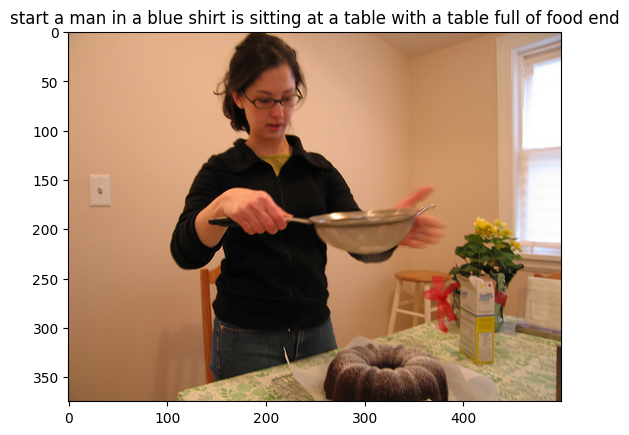

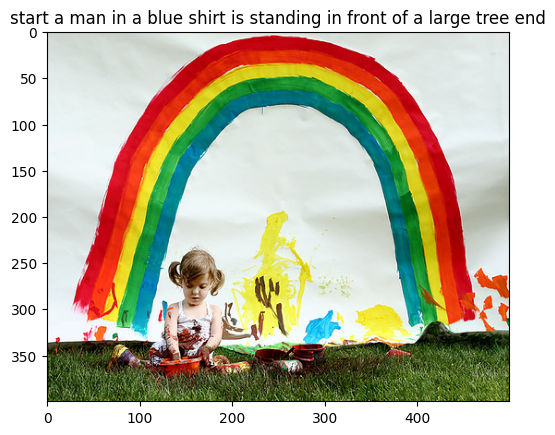

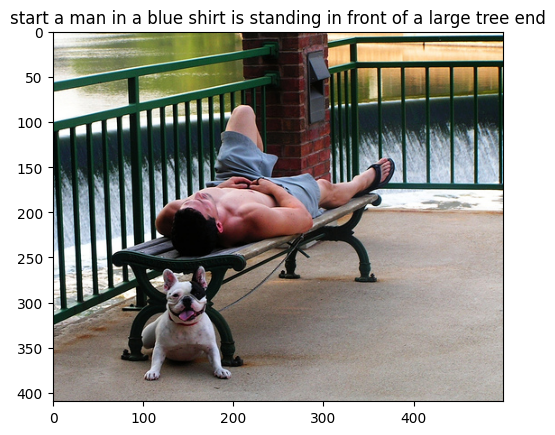

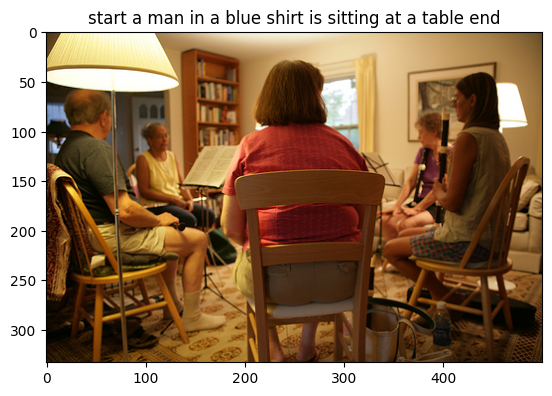

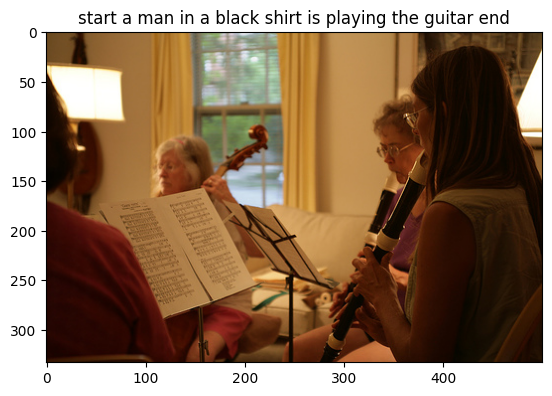

In [ ]:
# Define feature extraction function
def extract_features(image, model):
    image = image.resize((299,299))
    image = np.array(image)
    if image.shape[2] == 4:
        image = image[..., :3]
    image = np.expand_dims(image, axis=0)
    image = image / 127.5 - 1.0
    feature = model.predict(image)
    return feature

# Define function to map word index to word
def word_for_id(integer, tokenizer):
    for word, index in tokenizer.word_index.items():
        if index == integer:
            return word
    return None

# Define function to generate description
def generate_desc(model, tokenizer, photo, max_length):
    in_text = 'start'
    for i in range(max_length):
        sequence = tokenizer.texts_to_sequences([in_text])[0]
        sequence = pad_sequences([sequence], maxlen=max_length)
        pred = model.predict([photo, sequence], verbose=0)
        pred = np.argmax(pred)
        word = word_for_id(pred, tokenizer)
        if word is None:
            break
        in_text += ' ' + word
        if word == 'end':
            break
    return in_text

# Generate descriptions
max_length = 78
descriptions = []
for img in images:
    photo = extract_features(img, xception_model)
    description = generate_desc(model, tokenizer, photo, max_length)
    descriptions.append(description)

# Display images with their descriptions
for img, desc in zip(images, descriptions):
    plt.imshow(img)
    plt.title(desc)
    plt.show()

# Code below is to test individual images by uploading individual files

In [ ]:
type(model)

keras.src.models.functional.Functional

In [ ]:
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1             │ (None, 78)             │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ input_layer (InputLayer)  │ (None, 2048)           │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ embedding (Embedding)     │ (None, 78, 256)        │      4,591,616 │ input_layer_1[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout (Dropout)         │ (None, 2048)           │              0 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_1 (Dropout)       │ (None, 78, 256)        │              0 │ embedding[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ not_equal (NotEqual)      │ (None, 78)             │              0 │ input_layer_1[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense (Dense)             │ (None, 256)            │        524,544 │ dropout[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lstm (LSTM)               │ (None, 256)            │        525,312 │ dropout_1[0][0],       │
│                           │                        │                │ not_equal[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ add (Add)                 │ (None, 256)            │              0 │ dense[0][0],           │
│                           │                        │                │ lstm[0][0]             │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_1 (Dense)           │ (None, 256)            │         65,792 │ add[0][0]              │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_2 (Dense)           │ (None, 17936)          │      4,609,552 │ dense_1[0][0]          │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 30,950,450 (118.07 MB)

 Trainable params: 10,316,816 (39.36 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 20,633,634 (78.71 MB)

In [ ]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import load_model
from tensorflow.keras.applications.xception import Xception
import pickle
from google.colab import files
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.text import Tokenizer

# Upload the image
uploaded = files.upload()

# Set the image path
img_path = next(iter(uploaded))  # This will get the name of the uploaded image

Saving Screen Shot 2024-06-05 at 11.49.15 PM.png to Screen Shot 2024-06-05 at 11.49.15 PM.png


In [ ]:
def extract_features(filename, model):
    try:
        image = Image.open(filename)
    except:
        print("ERROR: Couldn't open image! Make sure the image path and extension is correct")
    image = image.resize((299,299))
    image = np.array(image)
    # for images that has 4 channels, we convert them into 3 channels
    if image.shape[2] == 4:
        image = image[..., :3]
    image = np.expand_dims(image, axis=0)
    image = image/127.5
    image = image - 1.0
    feature = model.predict(image)
    return feature

def word_for_id(integer, tokenizer):
    for word, index in tokenizer.word_index.items():
     if index == integer:
         return word
    return None

def generate_desc(model, tokenizer, photo, max_length):
    in_text = 'start'
    for i in range(max_length):
        sequence = tokenizer.texts_to_sequences([in_text])[0]
        sequence = pad_sequences([sequence], maxlen=max_length)
        pred = model.predict([photo,sequence], verbose=0)
        pred = np.argmax(pred)
        word = word_for_id(pred, tokenizer)
        if word is None:
            break
        in_text += ' ' + word
        if word == 'end':
            break
    return in_text

max_length = 78

# Load the tokenizer
with open("/content/drive/My Drive/Colab Notebooks/dsci471/models4/tokenizer_4_tux.pkl", "rb") as handle:
    tokenizer = pickle.load(handle)

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step



start a man in a red shirt is playing soccer end


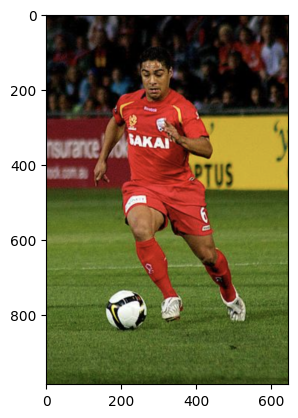

In [ ]:
# Load the Xception model
xception_model = Xception(include_top=False, pooling="avg")

# Extract features from the image
photo = extract_features(img_path, xception_model)
img = Image.open(img_path)
description = generate_desc(model, tokenizer, photo, max_length)
print("\n\n")
print(description)
plt.imshow(img)